## Semiconductor Device Experiment - Optimize - Revised on Oct 26th, 2020

### Load Libraries

In [1]:
# For scientific computing
import numpy as np
from scipy.stats import norm
from scipy.stats import poisson
from scipy.special import factorial
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit

# For plotting
import matplotlib.pyplot as plt

### Part 1 - Resistor Analysis
Read 3 columns of data; VE is power supply voltage, V is measured voltage of resistor, I is measure current through the resistor.
Sometimes, reading fails on the different operating system that encodes different scheme (especially PC that has been purchased aborad) so I encode with utf-8 to ensure the system can read our data without failure.

### Plotting the Raw data and Perform Least Square Fit (Revised)
Analyzing data with the consideration of uncertainties (using common uncertainties) and the residuals.

### Forward Direction Resistor

VE = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] V
V = [-0.11  0.99  2.    2.98  3.99  4.98  5.99  6.98  7.99  8.98  9.63] V
I = [-0.1  1.   2.1  3.1  4.1  5.1  6.1  7.1  8.1  9.1  9.8] mA

Degrees of freedom (N-2): 9
Intercept estimate with experimental uncertainty: (0.033 ± 0.06) mA
Slope estimate with experimental uncertainty: (1.01 ± 0.013) kOhm

experimental uncertainty, alpha_c : 0.06 mA
experimental uncertainty, alpha_m : 0.013 kOhm 


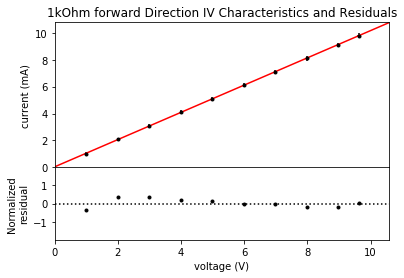

In [2]:
# --------------------------------------------------------------------------------------------------
# Read Data
# --------------------------------------------------------------------------------------------------

# you can either enter 1kOhm or 10kOhm
chosenR = "1kOhm"

#global string for labelling
labely = "current (mA)"
labelx = "voltage (V)"
bias = "forward"

VE, V, I, alpha_V, alpha_I = np.genfromtxt(f"data/2020-10-13-{chosenR}Resistor-{bias}.csv", delimiter=',', 
                            unpack=True, skip_header=1, encoding='utf_8_sig')

print(f"VE = {VE} V")
print(f"V = {V} V")
print(f"I = {I} mA")
print()

# --------------------------------------------------------------------------------------------------
# Fitting
# --------------------------------------------------------------------------------------------------

#inputs
x = V
y = I

#compute DMM uncertainties
# we don't use this since we are taking uncertainties directly from csv file, pre-calculated uncertainties
#alpha_V = 0.005 * np.ones(x.size) * V + 0.01
#alpha_I = 0.008 * np.ones(x.size) * I + 0.1
#print(alpha_V)
#print(alpha_I)

alpha_x = alpha_V
alpha_y = alpha_I

# Number of terms
N = len(x)

# compute c_hat, m_hat
#p, V = np.polyfit(x, y, 1, cov='True') # using common uncertainties
p, V = np.polyfit(x, y, 1, w=1/alpha_y, cov='unscaled') # using DMM uncertainties
m_hat = p[0]
c_hat = p[1]
alpha_m_hat = np.sqrt(V[0][0])
alpha_c_hat = np.sqrt(V[1][1])
alpha_CU = np.sqrt((1/(N-2)) * np.sum( (y - (m_hat*x + c_hat) )**2 ))

# --------------------------------------------------------------------------------------------------
# Residual analysis
# --------------------------------------------------------------------------------------------------

# Make a grid with 2 rows, 1 colum, a 3:1 height ratio, and no 
# height space between the rows
gs = GridSpec(2, 1, height_ratios=[4, 2], hspace=0)

# Create figure
fig = plt.figure()
x_range = [0, np.max(x) * 1.1]

# Compute the measurement residuals
residuals = y - (m_hat*x + c_hat)

# Compute the model curve
x_model = np.linspace(x_range[0], x_range[1])
y_model = m_hat*x_model + c_hat

# Make the main plot
ax_main = fig.add_subplot(gs[0])

# Plot data as black dots
plt.errorbar(x, y,xerr=alpha_x, yerr=alpha_y, fmt='k.')

# Plot fit as a red line
plt.plot(x_model, y_model, 'r-')

# Format top panel: set axis ranges and add y-axis label
# No x-axis label here to avoid overlap with residual plot
plt.xlim(x_range[0], x_range[1])
plt.ylim(0, np.max(y) * 1.1)
plt.ylabel(f"{labely}")
plt.title(f"1kOhm {bias} Direction IV Characteristics and Residuals")


# Hide x-tick labels to avoid overlap with residual plot
ax_main.set_xticklabels([])

# Make the residual plot with a dotted zero line
# Need to adjust ylim,  yticks, ylabel for readability
ax_res = fig.add_subplot(gs[1])

# Plot residuals as black dots
plt.plot(x, residuals/alpha_y,'k.')

# Show zero line as a black dotted line
plt.plot(x_range, [0,0], 'k:') #plt.plot([xmin,xmax],[ymin,ymax]) format

# Format bottom panel: set axis ranges, explicitly set
# y-tick values to avoid overlap with top panel, and
# add labels to x-axis and y-axis
plt.xlim(x_range[0], x_range[1])
plt.ylim(-2, 2)
plt.yticks([-1, 0, 1])
plt.xlabel(f"{labelx}")
plt.ylabel("Normalized\nresidual")


#Printing Results
# Show optimized fit parameters and uncertainties
print(f"Degrees of freedom (N-2): {N-2:d}")

# results using common uncertainties
print(f"Intercept estimate with experimental uncertainty: ({c_hat:.3f} ± {alpha_c_hat:.2f}) mA")
print(f"Slope estimate with experimental uncertainty: ({m_hat:.2f} ± {alpha_m_hat:.3f}) kOhm")
print()
print(f"experimental uncertainty, alpha_c : {alpha_c_hat:.2f} mA")
print(f"experimental uncertainty, alpha_m : {alpha_m_hat:.3f} kOhm ")

# Show plot
plt.show();

### Reversed Direction 1kOhm Resistor

VE = [0.   1.   2.   3.   4.   5.   6.   7.   8.   9.   9.98] V
V = [-0.11  0.99  1.99  2.99  3.99  4.99  5.99  6.99  7.99  8.98  9.97] V
I = [-1.00e-02  1.00e+00  2.10e+00  3.10e+00  4.10e+00  5.10e+00  6.10e+00
  7.10e+00  8.10e+00  9.10e+00  1.01e+01] mA

Degrees of freedom (N-2): 9
Intercept estimate with experimental uncertainty: (-0.0745 ± 0.06) mA
Slope estimate with experimental uncertainty: (1.0057 ± 0.01) kOhm

Experimental, alpha_c : 0.06 mA
Experimental, alpha_m : 0.01 kOhm 


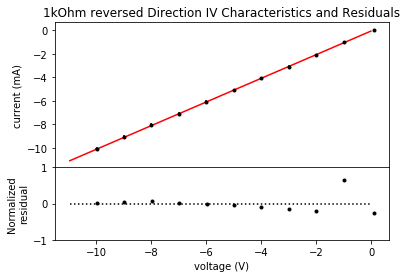

In [3]:
# --------------------------------------------------------------------------------------------------
# Read Data
# --------------------------------------------------------------------------------------------------

# you can either enter 1kOhm or 10kOhm
chosenR = "1kOhm"

#global string for labelling
labely = "current (mA)"
labelx = "voltage (V)"
bias = "reversed"

VE, V, I, alpha_V, alpha_I = np.genfromtxt(f"data/2020-10-13-{chosenR}Resistor-{bias}.csv", delimiter=',', 
                            unpack=True, skip_header=1, encoding='utf_8_sig')

print(f"VE = {VE} V")
print(f"V = {V} V")
print(f"I = {I} mA")
print()

# --------------------------------------------------------------------------------------------------
# Fitting
# --------------------------------------------------------------------------------------------------

#inputs
# multiply by -1 to account for negative direction
V = V * -1
I = I * -1
alpha_V = alpha_V
alpha_I = alpha_I

#compute DMM uncertainties # done on the csv file
#alpha_V = 0.005 * np.ones(x.size) * V + 0.01
#alpha_I = 0.008 * np.ones(x.size) * I + 0.1
#print(alpha_V)
#print(alpha_I)

x = V
y = I
alpha_x = alpha_V
alpha_y = alpha_I

# Number of terms
N = len(x)

# compute c_hat, m_hat
#p, V = np.polyfit(x, y, 1, cov='True') # using common uncertainties
p, V = np.polyfit(x, y, 1, w=1/alpha_y, cov='unscaled') # using DMM uncertainties
m_hat = p[0]
c_hat = p[1]
alpha_m_hat_CU = np.sqrt(V[0][0])
alpha_c_hat_CU = np.sqrt(V[1][1])
alpha_CU = np.sqrt((1/(N-2)) * np.sum( (y - (m_hat*x + c_hat) )**2 ))

# --------------------------------------------------------------------------------------------------
# Residual analysis
# --------------------------------------------------------------------------------------------------

# Make a grid with 2 rows, 1 colum, a 3:1 height ratio, and no 
# height space between the rows
gs = GridSpec(2, 1, height_ratios=[4, 2], hspace=0)

# Create figure
fig = plt.figure()
x_range = [-np.max(abs(x)) * 1.1, 0]

# Compute the measurement residuals
residuals = y - (m_hat*x + c_hat)

# Compute the model curve
x_model = np.linspace(x_range[0], x_range[1])
y_model = m_hat*x_model + c_hat

# Make the main plot
ax_main = fig.add_subplot(gs[0])

# Plot data as black dots
plt.errorbar(x, y,xerr=alpha_x, yerr=alpha_y, fmt='k.')

# Plot fit as a red line
plt.plot(x_model, y_model, 'r-')

# Format top panel: set axis ranges and add y-axis label
# No x-axis label here to avoid overlap with residual plot
plt.ylabel(f"{labely}")
plt.title(f"1kOhm {bias} Direction IV Characteristics and Residuals")


# Hide x-tick labels to avoid overlap with residual plot
ax_main.set_xticklabels([])

# Make the residual plot with a dotted zero line
ax_res = fig.add_subplot(gs[1])

# Plot residuals as black dots
plt.plot(x, residuals/alpha_y,'k.')

# Show zero line as a black dotted line
plt.plot(x_range, [0,0], 'k:') #plt.plot([xmin,xmax],[ymin,ymax]) format

# Format bottom panel: set axis ranges, explicitly set
# y-tick values to avoid overlap with top panel, and
# add labels to x-axis and y-axis
plt.yticks([-1, 0, 1])
plt.xlabel(f"{labelx}")
plt.ylabel("Normalized\nresidual")


#Printing Results
# Show optimized fit parameters and uncertainties
print(f"Degrees of freedom (N-2): {N-2:d}")

# results using common uncertainties
print(f"Intercept estimate with experimental uncertainty: ({c_hat:.4f} ± {alpha_c_hat:.2f}) mA")
print(f"Slope estimate with experimental uncertainty: ({m_hat:.4f} ± {alpha_m_hat:.2f}) kOhm")
print()
print(f"Experimental, alpha_c : {alpha_c_hat:.2f} mA")
print(f"Experimental, alpha_m : {alpha_m_hat:.2f} kOhm ")

# Show plot
plt.show();

### Part 2 PN Junction-based Diode Analysis

VE = [0.   0.08 0.16 0.24 0.28 0.3  0.32 0.36 0.4  0.44 0.46 0.47 0.48 0.5
 0.53 0.56 0.64 0.72 0.8  0.81] V
V = [-0.11  0.08  0.16  0.23  0.28  0.29  0.32  0.35  0.39  0.43  0.45  0.46
  0.47  0.49  0.52  0.54  0.61  0.66  0.69  0.69] V
I = [0.   0.   0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.03 0.05 0.06 0.07 0.11
 0.23 0.41 1.82 4.72 9.14 9.89] mA

p0 = (0.0000039 ± 0.0000003) mA
p1 = (21.3 ± 0.1) C/J


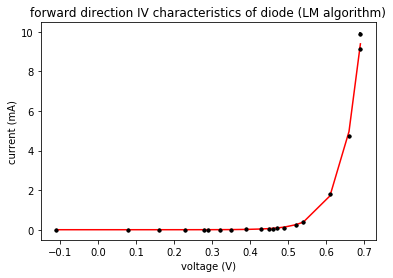

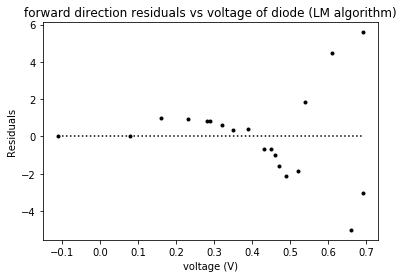

In [4]:
# --------------------------------------------------------------------------------------------------
# Read Data
# --------------------------------------------------------------------------------------------------

#global string for labelling
labely = "current (mA)"
labelx = "voltage (V)"
bias = "forward"

VE, V, I, alpha_V, alpha_I = np.genfromtxt(f"data/2020-10-13-diode-{bias}.csv", delimiter=',', 
                            unpack=True, skip_header=1, encoding='utf_8_sig')

print(f"VE = {VE} V")
print(f"V = {V} V")
print(f"I = {I} mA")
print()

# inputs
x = V
y = I
alpha_x = alpha_V
alpha_y = alpha_I

#global string for labelling
labely = "current (mA)"
labelx = "voltage (V)"

def myFunc(x, p0, p1):
    y = p0 * (np.exp(p1*x) - 1.0)
    return y


pOpt, pCov = curve_fit(myFunc, x, y,
                       p0=[0.01, 1], # trial and error
                       sigma=alpha_y,
                       absolute_sigma=True) # abs sigma set to true if y error is known with the samee unit

# Assign each element of pOpt to a named variable
p0_opt = pOpt[0]
p1_opt = pOpt[1]

# Compute the standard errors for the parameters
# by taking the square root of the diagonal elements of pCov
alpha_vec = np.sqrt(np.diag(pCov))

# Assign each element of alpha_vec to a named variable
alpha_p0 = alpha_vec[0]
alpha_p1 = alpha_vec[1]

# Show optimized fit parameters and uncertainties
print(f"p0 = ({p0_opt:.7f} ± {alpha_p0:.7f}) mA")
print(f"p1 = ({p1_opt:.1f} ± {alpha_p1:.1f}) C/J")


# Plot data
plt.plot(x, y, 'k.')
plt.plot(x, myFunc(x, p0_opt, p1_opt), 'r-')
plt.errorbar(x, y, yerr=alpha_y, fmt='k.')
plt.xlabel(f'{labelx}')
plt.ylabel(f'{labely}')
plt.title(f'{bias} direction IV characteristics of diode (LM algorithm)')
plt.show()

# Plot the residuals in a separate figure
plt.plot(x, (y - myFunc(x, p0_opt, p1_opt))/alpha_y, 'k.')
plt.plot([np.min(x), np.max(x)], [0,0], 'k:') #plt.plot([xmin,xmax],[ymin,ymax]) format
plt.xlabel(f"{labelx}")
plt.ylabel('Residuals')
plt.title(f'{bias} direction residuals vs voltage of diode (LM algorithm)')
plt.show()

### Part 2 PN Junction-based Diode Analysis

VE = [ 0.    2.    4.    6.    8.   10.   12.   14.   16.   18.   20.   22.
 28.   34.67] V
V = [-0.11  2.    4.    6.    8.   10.   12.01 14.01 16.01 18.02 20.1  22.1
 28.1  34.8 ] V
I = [0.    0.001 0.001 0.001 0.001 0.002 0.002 0.002 0.002 0.002 0.003 0.003
 0.003 0.004] mA

p0 = (0.005 ± 0.004) mA
p1 = (0.04 ± 0.04) C/J


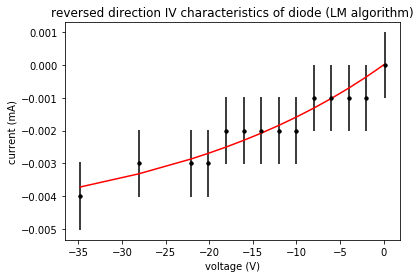

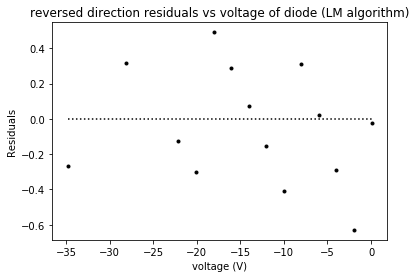

In [5]:
# --------------------------------------------------------------------------------------------------
# Read Data
# --------------------------------------------------------------------------------------------------

#global string for labelling
labely = "current (mA)"
labelx = "voltage (V)"
bias = "reversed"

VE, V, I, alpha_V, alpha_I = np.genfromtxt(f"data/2020-10-13-diode-{bias}.csv", delimiter=',', 
                            unpack=True, skip_header=1, encoding='utf_8_sig')

print(f"VE = {VE} V")
print(f"V = {V} V")
print(f"I = {I} mA")
print()

# inputs
# multiply by -1 to account for negative direction
x = V * -1
y = I * -1
alpha_x = alpha_V
alpha_y = alpha_I

#global string for labelling
labely = "current (mA)"
labelx = "voltage (V)"

def myFunc(x, p0, p1):
    y = p0 * (np.exp(p1*x) - 1.0)
    #y = p0 * x + p1
    return y


pOpt, pCov = curve_fit(myFunc, x, y,
                       p0=[0.01, 1], # trial and error
                       sigma=alpha_y,
                       absolute_sigma=True) # abs sigma set to true if y error is known with the samee unit

# Assign each element of pOpt to a named variable
p0_opt = pOpt[0]
p1_opt = pOpt[1]

# Compute the standard errors for the parameters
# by taking the square root of the diagonal elements of pCov
alpha_vec = np.sqrt(np.diag(pCov))

# Assign each element of alpha_vec to a named variable
alpha_p0 = alpha_vec[0]
alpha_p1 = alpha_vec[1]

# Show optimized fit parameters and uncertainties
print(f"p0 = ({p0_opt:.3f} ± {alpha_p0:.3f}) mA")
print(f"p1 = ({p1_opt:.2f} ± {alpha_p1:.2f}) C/J")


# Plot data
plt.plot(x, y, 'k.')
plt.plot(x, myFunc(x, p0_opt, p1_opt), 'r-')
plt.errorbar(x, y, yerr=alpha_y, fmt='k.')
plt.xlabel(f'{labelx}')
plt.ylabel(f'{labely}')
plt.title(f'{bias} direction IV characteristics of diode (LM algorithm)')
plt.show()

# Plot the residuals in a separate figure
plt.plot(x, (y - myFunc(x, p0_opt, p1_opt))/alpha_y, 'k.')
plt.plot([np.min(x), np.max(x)], [0,0], 'k:') #plt.plot([xmin,xmax],[ymin,ymax]) format
plt.xlabel(f"{labelx}")
plt.ylabel('Residuals')
plt.title(f'{bias} direction residuals vs voltage of diode (LM algorithm)')
plt.show()

### Part 2 PN Junction-based Diode Analysis - Linearization

VE = [ 0.    2.    4.    6.    8.   10.   12.   14.   16.   18.   20.   22.
 28.   34.67] V
V = [-0.11  2.    4.    6.    8.   10.   12.01 14.01 16.01 18.02 20.1  22.1
 28.1  34.8 ] V
I = [0.    0.001 0.001 0.001 0.001 0.002 0.002 0.002 0.002 0.002 0.003 0.003
 0.003 0.004] mA

Degrees of freedom (N-2): 12
Intercept estimate with experimental uncertainty: (0.0005 ± 0.0005) mA
Slope estimate with experimental uncertainty: (0.00010 ± 0.00003) kOhm

Experimental uncertainty, alpha_c : 0.0005 mA
Experimental uncertainty, alpha_m : 0.00003 kOhm 
R = 9810.05094390716 


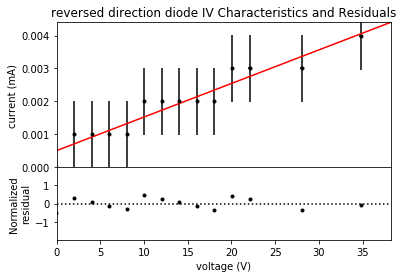

In [6]:
# --------------------------------------------------------------------------------------------------
# Read Data
# --------------------------------------------------------------------------------------------------

# you can either enter 1kOhm or 10kOhm
chosenR = "1kOhm"

#global string for labelling
labely = "current (mA)"
labelx = "voltage (V)"
bias = "reversed"

VE, V, I, alpha_V, alpha_I = np.genfromtxt(f"data/2020-10-13-diode-{bias}.csv", delimiter=',', 
                            unpack=True, skip_header=1, encoding='utf_8_sig')

print(f"VE = {VE} V")
print(f"V = {V} V")
print(f"I = {I} mA")
print()

# --------------------------------------------------------------------------------------------------
# Fitting
# --------------------------------------------------------------------------------------------------

#inputs
x = V
y = I

#compute DMM uncertainties
# we don't use this since we are taking uncertainties directly from csv file, pre-calculated uncertainties
#alpha_V = 0.005 * np.ones(x.size) * V + 0.01
#alpha_I = 0.008 * np.ones(x.size) * I + 0.1
#print(alpha_V)
#print(alpha_I)

alpha_x = alpha_V
alpha_y = alpha_I

# Number of terms
N = len(x)

# compute c_hat, m_hat
#p, V = np.polyfit(x, y, 1, cov='True') # using common uncertainties
p, V = np.polyfit(x, y, 1, w=1/alpha_y, cov='unscaled') # using DMM uncertainties
m_hat = p[0]
c_hat = p[1]
alpha_m_hat = np.sqrt(V[0][0])
alpha_c_hat = np.sqrt(V[1][1])
alpha_CU = np.sqrt((1/(N-2)) * np.sum( (y - (m_hat*x + c_hat) )**2 ))

# --------------------------------------------------------------------------------------------------
# Residual analysis
# --------------------------------------------------------------------------------------------------

# Make a grid with 2 rows, 1 colum, a 3:1 height ratio, and no 
# height space between the rows
gs = GridSpec(2, 1, height_ratios=[4, 2], hspace=0)

# Create figure
fig = plt.figure()
x_range = [0, np.max(x) * 1.1]

# Compute the measurement residuals
residuals = y - (m_hat*x + c_hat)

# Compute the model curve
x_model = np.linspace(x_range[0], x_range[1])
y_model = m_hat*x_model + c_hat

# Make the main plot
ax_main = fig.add_subplot(gs[0])

# Plot data as black dots
plt.errorbar(x, y,xerr=alpha_x, yerr=alpha_y, fmt='k.')

# Plot fit as a red line
plt.plot(x_model, y_model, 'r-')

# Format top panel: set axis ranges and add y-axis label
# No x-axis label here to avoid overlap with residual plot
plt.xlim(x_range[0], x_range[1])
plt.ylim(0, np.max(y) * 1.1)
plt.ylabel(f"{labely}")
plt.title(f"{bias} direction diode IV Characteristics and Residuals")


# Hide x-tick labels to avoid overlap with residual plot
ax_main.set_xticklabels([])

# Make the residual plot with a dotted zero line
# Need to adjust ylim,  yticks, ylabel for readability
ax_res = fig.add_subplot(gs[1])

# Plot residuals as black dots
plt.plot(x, residuals/alpha_y,'k.')

# Show zero line as a black dotted line
plt.plot(x_range, [0,0], 'k:') #plt.plot([xmin,xmax],[ymin,ymax]) format

# Format bottom panel: set axis ranges, explicitly set
# y-tick values to avoid overlap with top panel, and
# add labels to x-axis and y-axis
plt.xlim(x_range[0], x_range[1])
plt.ylim(-2, 2)
plt.yticks([-1, 0, 1])
plt.xlabel(f"{labelx}")
plt.ylabel("Normalized\nresidual")


#Printing Results
# Show optimized fit parameters and uncertainties
print(f"Degrees of freedom (N-2): {N-2:d}")

# results using common uncertainties
print(f"Intercept estimate with experimental uncertainty: ({c_hat:.4f} ± {alpha_c_hat:.4f}) mA")
print(f"Slope estimate with experimental uncertainty: ({m_hat:.5f} ± {alpha_m_hat:.5f}) kOhm")
print()
print(f"Experimental uncertainty, alpha_c : {alpha_c_hat:.4f} mA")
print(f"Experimental uncertainty, alpha_m : {alpha_m_hat:.5f} kOhm ")
print(f"R = {1/m_hat} ")
# Show plot
plt.show();
